In [39]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

(400, 300)


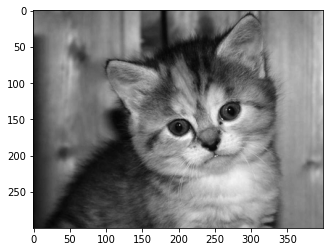

In [40]:
img = Image.open('cat.bmp')
#image to grayscale
img = img.convert('L')
plt.imshow(img,cmap='gray')
print(img.size)

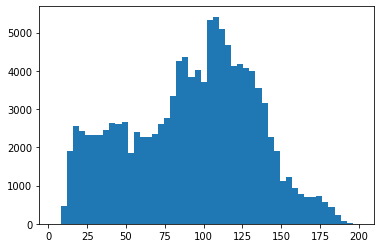

In [46]:
# convert our image into a numpy array
img1 = np.asarray(img)

# put pixels in a 1D array by flattening out img array
flat = img1.flatten()
# show the histogram
plt.hist(flat, bins=50)
plt.show()

In [42]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)

    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1

    # return our final result
    return histogram


# execute our histogram function
hist = get_histogram(flat, 256)

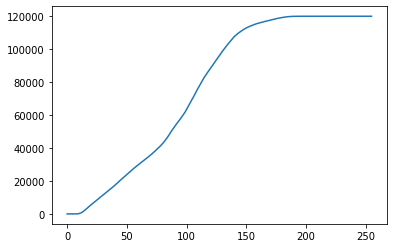

In [43]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)


# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

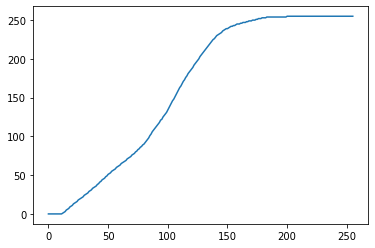

In [44]:
# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

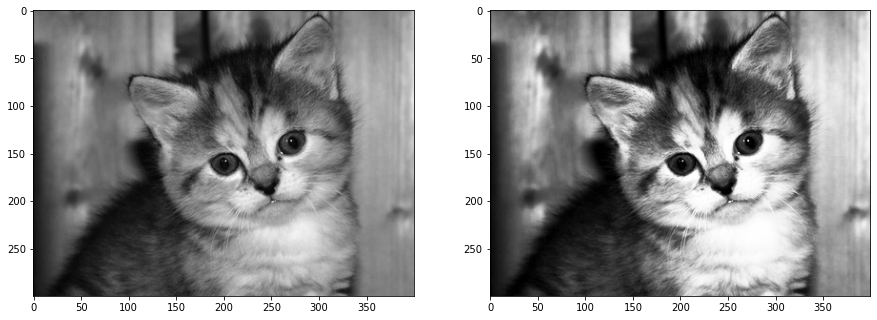

In [45]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img1.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)
